## 例4-1. Pythonで、Yelpのレビューデータを読み込み、クリーニングを行う

In [3]:
import json
import pandas as pd

# Yelpのビジネスデータを読み込み
with open('data/yelp/yelp_academic_dataset_business.json') as biz_f:
    biz_df = pd.DataFrame([json.loads(x) for x in biz_f.readlines()])

# Yelpのレビューデータを読み込み
with open('data/yelp/yelp_academic_dataset_review.json') as review_file:
    review_df = pd.DataFrame([json.loads(x) for x in review_file.readlines()])

# YelpのビジネスデータからcategoriesがNightlife（ナイトライフ@<fn>{nightlife}）またはRestaurants(レストラン)のデータを取り出し
filter_func = lambda x:  len(set(x) &  set(['Nightlife', 'Restaurants'])) > 0
twobiz = biz_df[biz_df['categories'].apply(filter_func)]

# 取り出した2つのカテゴリのYelpのビジネスデータとYelpのレビューデータを結合する
twobiz_reviews = twobiz.merge(review_df, on='business_id', how='inner')

# 必要ない特徴量を排除
twobiz_reviews = twobiz_reviews[['business_id', 'name', 'stars_y', 'text', 'categories']]

# target列を作成。categoriesがNightlifeの時はTrue、それ以外の場合はFalse
twobiz_reviews['target'] =  twobiz_reviews['categories'].apply(set(['Nightlife']).issubset)

twobiz

,business_id,categories,city,full_address,latitude,longitude,name,neighborhoods,open,review_count,stars,state,type
4,PzOqRohWw7F7YEPBz6AubA,"[Food, Bagels, Delis, Restaurants]",Glendale Az,"6520 W Happy Valley Rd\nSte 101\nGlendale Az, ...",33.712797,-112.200264,Hot Bagels & Deli,[],True,14,3.5,AZ,business
9,qarobAbxGSHI7ygf1f7a_Q,"[Sandwiches, Restaurants]",Gilbert,"891 E Baseline Rd\nSuite 102\nGilbert, AZ 85233",33.378839,-111.812007,Jersey Mike's Subs,[],True,10,3.5,AZ,business
11,gA5CuBxF-0CnOpGnryWJdQ,"[Mexican, Restaurants]",Phoenix,"519 W Thomas Rd\nPhoenix, AZ 85013",33.480105,-112.081361,La Paloma Mexican Food,[],True,5,4.0,AZ,business
13,JxVGJ9Nly2FFIs_WpJvkug,"[Pizza, Restaurants]",Scottsdale,"14418 N Scottsdale Rd\nSuite 181\nScottsdale, ...",33.617459,-111.926272,Sauce,[],True,55,4.0,AZ,business
17,Jj7bcQ6NDfKoz4TXwvYfMg,"[Burgers, Restaurants]",Phoenix,"8941 N Black Canyon Hwy\nPhoenix, AZ 85021",33.566989,-112.116243,Fuddruckers,[],True,23,4.0,AZ,business
21,QL3vFMAsEHqfi1KGH-4igg,"[Bars, Nightlife, Lounges]",Scottsdale,Mondrian Hotel Scottsdale\n7353 E Indian Schoo...,33.494470,-111.924226,Red Bar,[],False,11,3.0,AZ,business
22,yOYFhiTjT-SM4spKtDk92w,"[Buffets, Dim Sum, Chinese, Restaurants]",Phoenix,"10227 N Metro Pkwy E\nPhoenix, AZ 85051",33.580359,-112.120516,China Chan Restaurant,[],False,42,3.5,AZ,business
23,4IAzFJ159GEaIGX1-y6Bmw,"[Burgers, Fast Food, Restaurants]",Scottsdale,"9251 E Shea Blvd\nScottsdale, AZ 85258",33.581867,-111.881625,McDonald's,[],True,3,2.5,AZ,business
26,MLAnvEcvDfOWELHUN_0xEw,"[Food, Breweries, American (New), Restaurants]",Scottsdale,"7001 N Scottsdale Rd\nSte 147\nScottsdale, AZ ...",33.538847,-111.964173,Nimbus American Bistro N' Brewery,[],False,85,3.0,AZ,business
29,JHp5mJvYe6UtM_QsklR-iw,"[Pizza, Restaurants]",Scottsdale,"7607 E McDowell Road\nSuite 101\nScottsdale, A...",33.466126,-111.917542,Peter Piper Pizza,[],True,9,3.0,AZ,business


## 例4-2. クラス均衡の取れた分類用データセットの作成

In [2]:
from sklearn.model_selection import train_test_split

# サンプリングしてクラス均衡を是正したデータセットを作成
nightlife = twobiz_reviews[twobiz_reviews['categories'].apply(set(['Nightlife']).issubset)]
restaurants = twobiz_reviews[twobiz_reviews['categories'].apply(set(['Restaurants']).issubset)]

nightlife_subset = nightlife.sample(frac=0.1, random_state=123)
restaurant_subset = restaurants.sample(frac=0.021, random_state=123)
combined = pd.concat([nightlife_subset, restaurant_subset])

# 学習データとテストデータに分割
training_data, test_data = train_test_split(combined, test_size=0.3, random_state=123)
training_data.shape

(4438, 6)

In [6]:
test_data.shape

(1903, 6)

## 例4-3. 特徴量の変換

In [7]:
from sklearn.feature_extraction import text

# レビューをBag-of-Wordsで表す
bow_transform = text.CountVectorizer()
X_tr_bow = bow_transform.fit_transform(training_data['text'])
X_te_bow = bow_transform.transform(test_data['text'])
len(bow_transform.vocabulary_)

18565

In [8]:
from sklearn.preprocessing import normalize

y_tr = training_data['target']
y_te = test_data['target']

# Bag-of-Words行列からTF-IDFを作成
tfidf_trfm = text.TfidfTransformer(norm=None)
X_tr_tfidf = tfidf_trfm.fit_transform(X_tr_bow)
X_te_tfidf = tfidf_trfm.transform(X_te_bow)

#  Bag-of-WordsのL2正規化
X_tr_l2 = normalize(X_tr_bow, norm='l2', axis=0)
X_te_l2 = normalize(X_te_bow, norm='l2', axis=0)

## 例4-4. デフォルトのパラメータでロジスティック回帰を学習

In [10]:
from sklearn.linear_model import LogisticRegression

def simple_logistic_classify(X_tr, y_tr, X_test, y_test, description, _C=1.0):
### ロジスティック回帰で学習し、テストデータでの予測結果を得る関数
    m = LogisticRegression(solver='liblinear', C=_C).fit(X_tr, y_tr)
    s = m.score(X_test, y_test)
    print ('Test score with', description, 'features:', s)
    return m

m1 = simple_logistic_classify(X_tr_bow, y_tr, X_te_bow, y_te, 'bow')
m2 = simple_logistic_classify(X_tr_l2, y_tr, X_te_l2, y_te, 'l2-normalized')
m3 = simple_logistic_classify(X_tr_tfidf, y_tr, X_te_tfidf, y_te, 'tf-idf')

Test score with bow features: 0.7677351550183921
Test score with l2-normalized features: 0.7856016815554387
Test score with tf-idf features: 0.7545980031529165


## 例4-5. ロジスティック回帰のハイパーパラメータをグリッドサーチでチューニング

In [15]:
from sklearn.model_selection import GridSearchCV

# 探索範囲を指定して、5分割でグリッドサーチを実行します
param_grid_ = {'C': [1e-5, 1e-3, 1e-1, 1e0, 1e1, 1e2]}

# Bag-of-Wordsでの分類器をチューニング
bow_search = GridSearchCV(LogisticRegression(solver='liblinear'), cv=5, param_grid=param_grid_, return_train_score=True)
bow_search.fit(X_tr_bow, y_tr)

# L2正規化単語ベクトルでの分類器をチューニング
l2_search = GridSearchCV(LogisticRegression(solver='liblinear'), cv=5, param_grid=param_grid_, return_train_score=True)
l2_search.fit(X_tr_l2, y_tr)

# TF-IDFでの分類器をチューニング
tfidf_search = GridSearchCV(LogisticRegression(solver='liblinear'), cv=5, param_grid=param_grid_, return_train_score=True)
tfidf_search.fit(X_tr_tfidf, y_tr)

# グリッドサーチにおける出力を見て、挙動を確認します
bow_search.cv_results_

{'mean_fit_time': array([0.02284245, 0.03094606, 0.09994922, 0.18317661, 0.2983623 ,
        0.36459799]),
 'std_fit_time': array([0.00361478, 0.00325399, 0.00651312, 0.01971228, 0.03876367,
        0.07659238]),
 'mean_score_time': array([0.00059695, 0.00053682, 0.00058837, 0.00053582, 0.00063848,
        0.00054684]),
 'std_score_time': array([7.84511471e-05, 6.12991925e-05, 5.67517155e-05, 4.65270910e-05,
        1.02076570e-04, 8.98440928e-05]),
 'param_C': masked_array(data=[1e-05, 0.001, 0.1, 1.0, 10.0, 100.0],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 1e-05},
  {'C': 0.001},
  {'C': 0.1},
  {'C': 1.0},
  {'C': 10.0},
  {'C': 100.0}],
 'split0_test_score': array([0.54842342, 0.76013514, 0.78490991, 0.76576577, 0.75112613,
        0.73423423]),
 'split1_test_score': array([0.55067568, 0.72072072, 0.77702703, 0.76801802, 0.7545045 ,
        0.75112613]),
 'split2_test_score': array([0.5518018

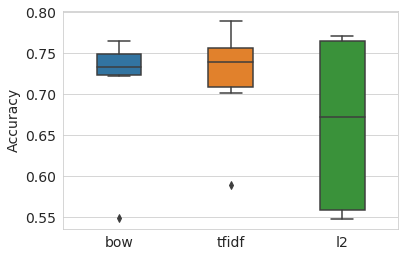

In [12]:
# クロスバリデーションの結果を箱ひげ図でプロットする
# 分類器のパフォーマンスを可視化して比較する
search_results = pd.DataFrame.from_dict({
    'bow': bow_search.cv_results_['mean_test_score'],
    'tfidf': tfidf_search.cv_results_['mean_test_score'],
    'l2': l2_search.cv_results_['mean_test_score']
})

# matplotlibでグラフを描く。ここでSeabornはグラフの見た目を整える為に用いている。
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
ax = sns.boxplot(data=search_results, width=0.4)
ax.set_ylabel('Accuracy', size=14)
ax.tick_params(labelsize=14)

## 例4-6. 異なる特徴量で比較するための最終的な学習と検証

In [16]:
# クロスバリデーションで得られた最適なハイパーパラメータと学習用データ全てを用いて最終的なモデルを学習し、そのモデルを用いて検証用データにおける精度を算出する
m1 = simple_logistic_classify(X_tr_bow, y_tr, X_te_bow, y_te, 'bow',  _C=bow_search.best_params_['C'])
m2 = simple_logistic_classify(X_tr_l2, y_tr, X_te_l2, y_te, 'l2-normalized',  _C=l2_search.best_params_['C'])
m3 = simple_logistic_classify(X_tr_tfidf, y_tr, X_te_tfidf, y_te, 'tf-idf',  _C=tfidf_search.best_params_['C'])

Test score with bow features: 0.7682606410930111
Test score with l2-normalized features: 0.7856016815554387
Test score with tf-idf features: 0.792433000525486
